# Import Library

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf

# Input Data

In [ ]:
data = pd.read_csv('MilkQuality.csv')
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


# Check Missing Value

In [ ]:
# untuk melihat apakah terdapat missing value pada data, dapat kita gunakan syntax sebagai berikut
data.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


# Information Of Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


# Deskripsi statistik data

In [ ]:
deskripsi_statistik = data[['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Fat ']].describe()
deskripsi_statistik

,pH,Temprature,Taste,Odor,Turbidity,Fat
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.491029,0.671388
std,1.399679,10.098364,0.498046,0.495655,0.500156,0.469930
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,0.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols_to_map = ['Taste', 'Odor', 'Turbidity','Fat ']

# Lakukan pemetaan dan simpan perubahan langsung ke dalam DataFrame
data[cols_to_map] = data[cols_to_map].replace({0: 'Bad', 1: 'Good'})
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,Good,Bad,254,high
1,6.6,36,Bad,Good,Bad,Good,253,high
2,8.5,70,Good,Good,Good,Good,246,low
3,9.5,34,Good,Good,Bad,Good,255,low
4,6.6,37,Bad,Bad,Bad,Bad,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,Good,Good,Bad,Bad,247,medium
1055,6.7,38,Good,Bad,Good,Bad,255,high
1056,3.0,40,Good,Good,Good,Good,255,low
1057,6.8,43,Good,Bad,Good,Bad,250,high


In [ ]:
cols_to_map = ['Colour']
# Lakukan pemetaan dan simpan perubahan langsung ke dalam DataFrame
data[cols_to_map] = data[cols_to_map].replace({254:'Alice Blue', 253:'Oldlace', 246:'Wildsand', 255:'White', 250:'Snow', 247:'grey', 245:'Whitesmoke', 240:'Honeydew', 248:'Ghost White'})
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,Good,Bad,Alice Blue,high
1,6.6,36,Bad,Good,Bad,Good,Oldlace,high
2,8.5,70,Good,Good,Good,Good,Wildsand,low
3,9.5,34,Good,Good,Bad,Good,White,low
4,6.6,37,Bad,Bad,Bad,Bad,White,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,Good,Good,Bad,Bad,grey,medium
1055,6.7,38,Good,Bad,Good,Bad,White,high
1056,3.0,40,Good,Good,Good,Good,White,low
1057,6.8,43,Good,Bad,Good,Bad,Snow,high


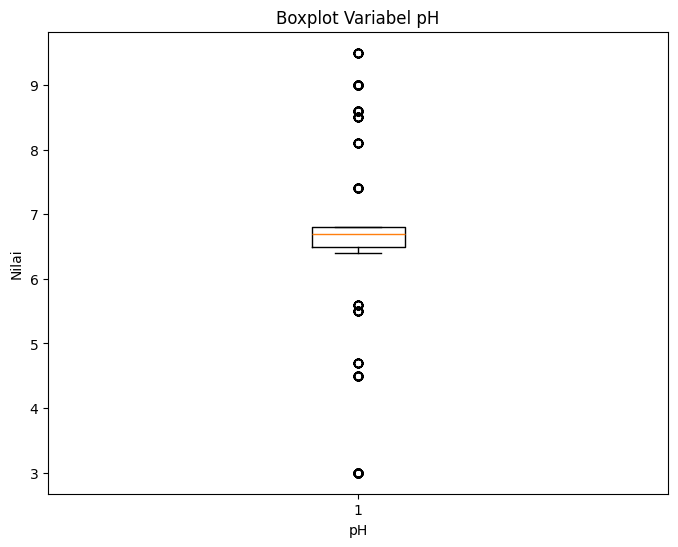

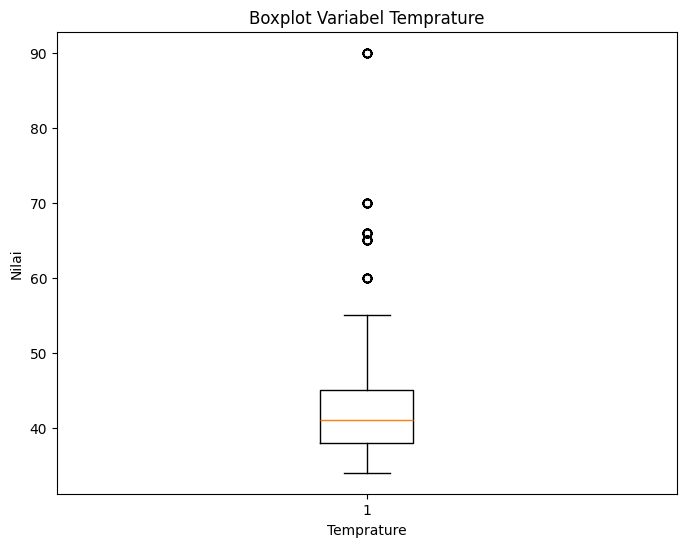

In [ ]:
# boxplot pH
plt.figure(figsize=(8, 6))
plt.boxplot(data['pH'])
plt.title('Boxplot Variabel pH')
plt.ylabel('Nilai')
plt.xlabel('pH')
plt.show()

# boxplot Temprature
plt.figure(figsize=(8, 6))
plt.boxplot(data['Temprature'])
plt.title('Boxplot Variabel Temprature')
plt.ylabel('Nilai')
plt.xlabel('Temprature')
plt.show()

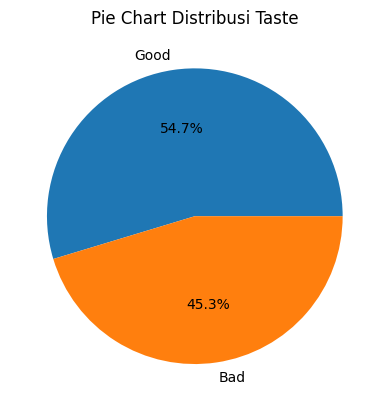

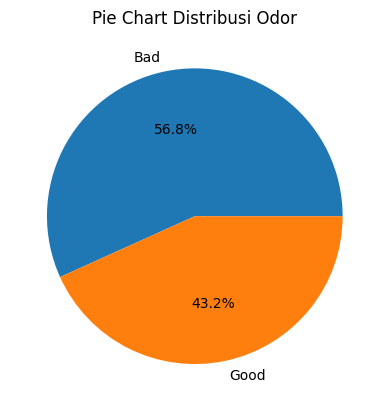

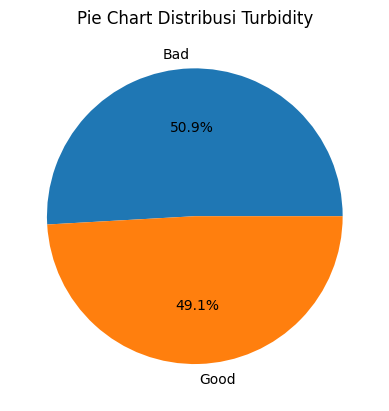

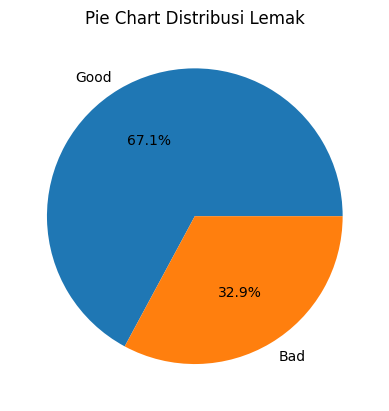

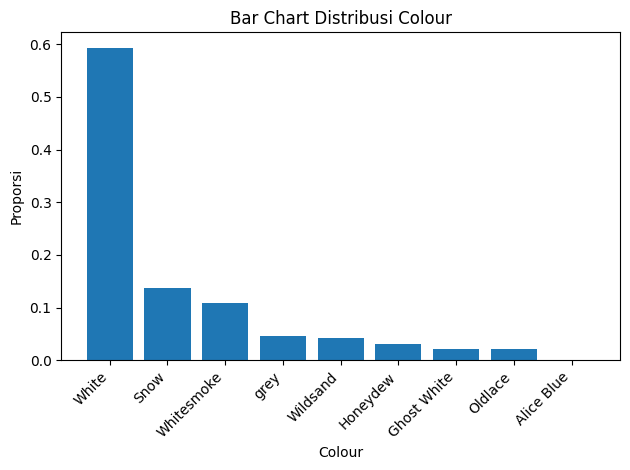

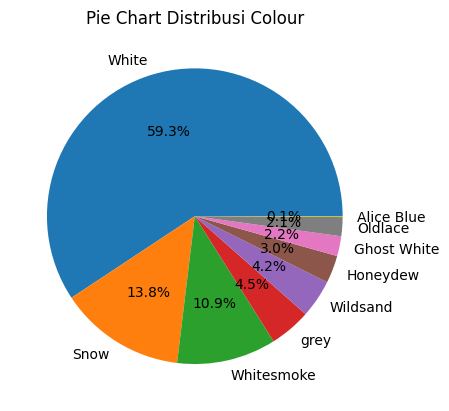

In [ ]:
# Menghitung proporsi setiap nilai "Taste"
proporsi = data["Taste"].value_counts(normalize=True)

# Membuat pie chart untuk variabel "Taste"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Taste")
plt.show()



# Menghitung proporsi setiap nilai "Odor"
proporsi = data["Odor"].value_counts(normalize=True)

# Membuat pie chart untuk variabel "odor"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Odor")
plt.show()



# Menghitung proporsi setiap nilai "Turbidity"
proporsi = data["Turbidity"].value_counts(normalize=True)

# Membuat pie chart untuk variabel "Turbidity"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Turbidity")
plt.show()



# Menghitung proporsi setiap nilai "Lemak"
proporsi = data['Fat '].value_counts(normalize=True)

# Membuat pie chart untuk variabel "Lemak"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Lemak")
plt.show()


# Menghitung proporsi setiap nilai "Colour"
proporsi = data["Colour"].value_counts(normalize=True)

# Membuat bar chart untuk variabel "Colour"
plt.bar(proporsi.index, proporsi.values)
plt.title("Bar Chart Distribusi Colour")
plt.xlabel("Colour")  # Label sumbu x
plt.ylabel("Proporsi")

# Mengatur label sumbu x menjadi miring dengan jarak yang cukup
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Mengatur layout agar tidak ada tumpang tindih

plt.show()


# Menghitung proporsi setiap nilai "Colour"
proporsi = data["Colour"].value_counts(normalize=True)

# Membuat pie chart untuk variabel "Colour"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Colour")
plt.show()


In [ ]:
# Deskripsi statistik data
deskripsi_statistik = data.describe()
deskripsi_statistik

,pH,Temprature
count,1059.000000,1059.000000
mean,6.630123,44.226629
std,1.399679,10.098364
min,3.000000,34.000000
25%,6.500000,38.000000
50%,6.700000,41.000000
75%,6.800000,45.000000
max,9.500000,90.000000


In [ ]:
le = LabelEncoder()
data['Grade']=le.fit_transform(data['Grade'])
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,Good,Bad,Alice Blue,0
1,6.6,36,Bad,Good,Bad,Good,Oldlace,0
2,8.5,70,Good,Good,Good,Good,Wildsand,1
3,9.5,34,Good,Good,Bad,Good,White,1
4,6.6,37,Bad,Bad,Bad,Bad,White,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,Good,Good,Bad,Bad,grey,2
1055,6.7,38,Good,Bad,Good,Bad,White,0
1056,3.0,40,Good,Good,Good,Good,White,1
1057,6.8,43,Good,Bad,Good,Bad,Snow,0


In [ ]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [ ]:
data['Taste']=le.fit_transform(data['Taste'])
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,Bad,Good,Bad,Alice Blue,0
1,6.6,36,0,Good,Bad,Good,Oldlace,0
2,8.5,70,1,Good,Good,Good,Wildsand,1
3,9.5,34,1,Good,Bad,Good,White,1
4,6.6,37,0,Bad,Bad,Bad,White,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,Good,Bad,Bad,grey,2
1055,6.7,38,1,Bad,Good,Bad,White,0
1056,3.0,40,1,Good,Good,Good,White,1
1057,6.8,43,1,Bad,Good,Bad,Snow,0


In [ ]:
data['Odor']=le.fit_transform(data['Odor'])
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,Good,Bad,Alice Blue,0
1,6.6,36,0,1,Bad,Good,Oldlace,0
2,8.5,70,1,1,Good,Good,Wildsand,1
3,9.5,34,1,1,Bad,Good,White,1
4,6.6,37,0,0,Bad,Bad,White,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,Bad,Bad,grey,2
1055,6.7,38,1,0,Good,Bad,White,0
1056,3.0,40,1,1,Good,Good,White,1
1057,6.8,43,1,0,Good,Bad,Snow,0


In [ ]:
data['Fat ']=le.fit_transform(data['Fat '])
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,Bad,Alice Blue,0
1,6.6,36,0,1,0,Good,Oldlace,0
2,8.5,70,1,1,1,Good,Wildsand,1
3,9.5,34,1,1,0,Good,White,1
4,6.6,37,0,0,0,Bad,White,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,Bad,grey,2
1055,6.7,38,1,0,1,Bad,White,0
1056,3.0,40,1,1,1,Good,White,1
1057,6.8,43,1,0,1,Bad,Snow,0


In [ ]:
data['Turbidity']=le.fit_transform(data['Turbidity'])
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,Alice Blue,0
1,6.6,36,0,1,0,1,Oldlace,0
2,8.5,70,1,1,1,1,Wildsand,1
3,9.5,34,1,1,0,1,White,1
4,6.6,37,0,0,0,0,White,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,grey,2
1055,6.7,38,1,0,1,0,White,0
1056,3.0,40,1,1,1,1,White,1
1057,6.8,43,1,0,1,0,Snow,0


In [ ]:
data['Colour']=le.fit_transform(data['Colour'])
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,0,0
1,6.6,36,0,1,0,1,3,0
2,8.5,70,1,1,1,1,7,1
3,9.5,34,1,1,0,1,5,1
4,6.6,37,0,0,0,0,5,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,8,2
1055,6.7,38,1,0,1,0,5,0
1056,3.0,40,1,1,1,1,5,1
1057,6.8,43,1,0,1,0,4,0


In [ ]:
data.Grade.value_counts().sort_values(ascending = False)

,count
Grade,
1,429
2,374
0,256


In [ ]:
X = data.drop(columns='Grade').values
y = data['Grade'].values  # Kolom label

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(sampling_strategy='all')

# Lakukan oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Buat DataFrame hasil oversampling
df_resampled = pd.DataFrame(X_resampled, columns=data.drop(columns='Grade').columns)
df_resampled['Grade'] = y_resampled
df_resampled

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35.0,1.0,0.0,1.0,0.0,0.0,0
1,6.6,36.0,0.0,1.0,0.0,1.0,3.0,0
2,8.5,70.0,1.0,1.0,1.0,1.0,7.0,1
3,9.5,34.0,1.0,1.0,0.0,1.0,5.0,1
4,6.6,37.0,0.0,0.0,0.0,0.0,5.0,2
...,...,...,...,...,...,...,...,...
1282,6.5,36.0,0.0,0.0,1.0,0.0,5.0,2
1283,6.6,38.0,0.0,0.0,0.0,0.0,5.0,2
1284,6.5,40.0,1.0,0.0,0.0,0.0,4.0,2
1285,6.5,36.0,0.0,0.0,1.0,0.0,5.0,2


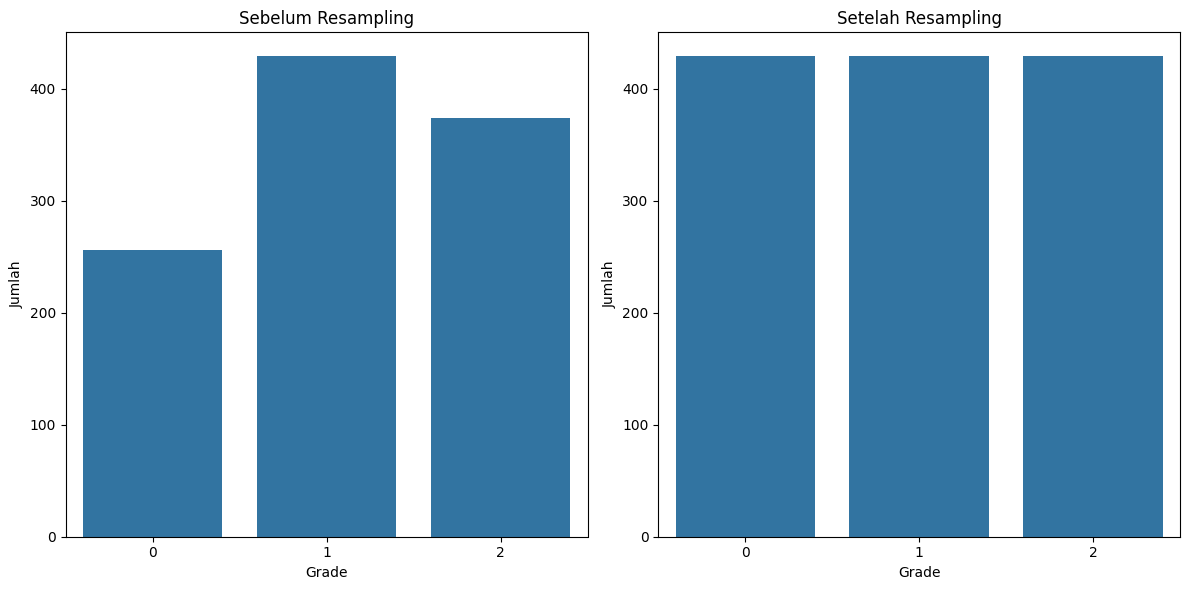

In [ ]:
# Plot Sebelum Resampling
plt.figure(figsize=(12, 6))  # Mengubah ukuran figure agar lebih besar
plt.subplot(1, 2, 1)
sns.countplot(x='Grade', data=data)
plt.title('Sebelum Resampling')
plt.xlabel('Grade')
plt.ylabel('Jumlah')

# Plot Setelah Resampling
plt.subplot(1, 2, 2)
sns.countplot(x='Grade', data=df_resampled)
plt.title('Setelah Resampling')
plt.xlabel('Grade')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# Scaling data

In [ ]:
sc = StandardScaler()
colomn = ['pH', 'Temprature']
df_resampled[colomn] = sc.fit_transform(df_resampled[colomn])
df_resampled

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,-0.029671,-0.907869,1.0,0.0,1.0,0.0,0.0,0
1,-0.029671,-0.801552,0.0,1.0,0.0,1.0,3.0,0
2,1.466284,2.813238,1.0,1.0,1.0,1.0,7.0,1
3,2.253629,-1.014187,1.0,1.0,0.0,1.0,5.0,1
4,-0.029671,-0.695234,0.0,0.0,0.0,0.0,5.0,2
...,...,...,...,...,...,...,...,...
1282,-0.108405,-0.801552,0.0,0.0,1.0,0.0,5.0,2
1283,-0.029671,-0.588917,0.0,0.0,0.0,0.0,5.0,2
1284,-0.108405,-0.376282,1.0,0.0,0.0,0.0,4.0,2
1285,-0.108405,-0.801552,0.0,0.0,1.0,0.0,5.0,2


In [ ]:
x = df_resampled.drop(columns='Grade')
y = df_resampled.Grade
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=0)
print('x_train', x_train.shape)
print('x_val', x_val.shape)
print('x_test', x_test.shape)

x_train (823, 7)
x_val (206, 7)
x_test (258, 7)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation='softmax')
])

scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    loss=scce,
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,371 (9.26 KB)

 Trainable params: 2,339 (9.14 KB)

 Non-trainable params: 32 (128.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=400, batch_size=16, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.3311 - loss: 1.3496 - val_accuracy: 0.3447 - val_loss: 1.0644
Epoch 2/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4296 - loss: 1.0977 - val_accuracy: 0.4854 - val_loss: 0.9932
Epoch 3/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4959 - loss: 1.0124 - val_accuracy: 0.5243 - val_loss: 0.9410
Epoch 4/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5553 - loss: 0.9311 - val_accuracy: 0.6699 - val_loss: 0.8903
Epoch 5/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 0.7834 - val_accuracy: 0.7282 - val_loss: 0.8250
Epoch 6/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.7825 - val_accuracy: 0.8398 - val_loss: 0.7415
Epoch 7/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.7367 - val_accuracy: 0.8398 - val_loss: 0.6878
Epoch 8/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.7236 - val_accuracy: 0.8398 -

In [ ]:
evaluation = model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9891 - loss: 0.0581


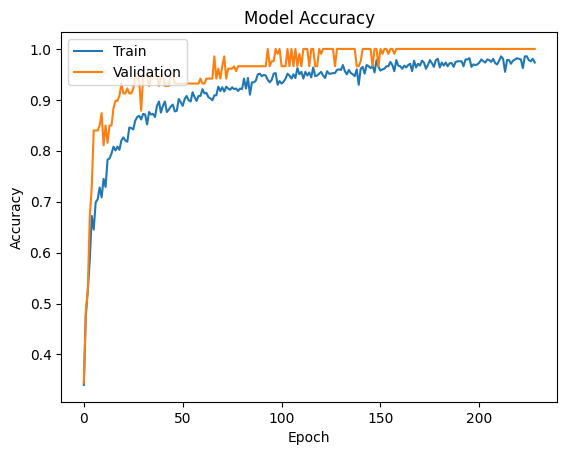

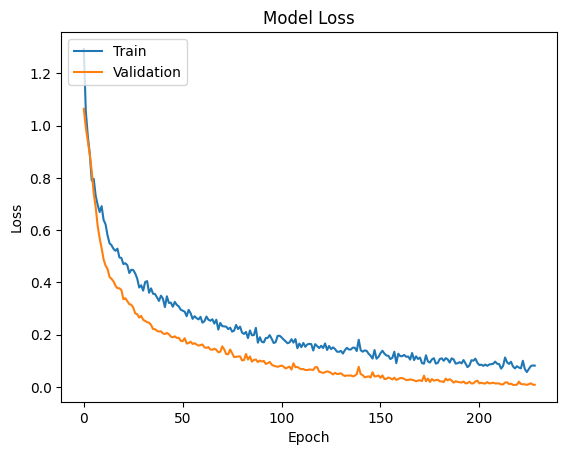

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
Y_pred = np.argmax(model.predict(x_test), axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
Y_pred

array([0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1,
       1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2])

In [ ]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        93
           1       1.00      0.98      0.99        87
           2       1.00      1.00      1.00        78

    accuracy                           0.99       258
   macro avg       0.99      0.99      0.99       258
weighted avg       0.99      0.99      0.99       258



In [ ]:
y_test

,Grade
655,0
330,1
1008,1
479,0
805,0
...,...
754,0
1054,2
44,2
923,0


In [ ]:
Y_pred

array([0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2,
       2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1,
       1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2])

In [ ]:
cm=confusion_matrix(y_test, Y_pred)
cm

array([[93,  0,  0],
       [ 2, 85,  0],
       [ 0,  0, 78]])

Text(0.5, 1.0, 'Confusion Matrix Model')

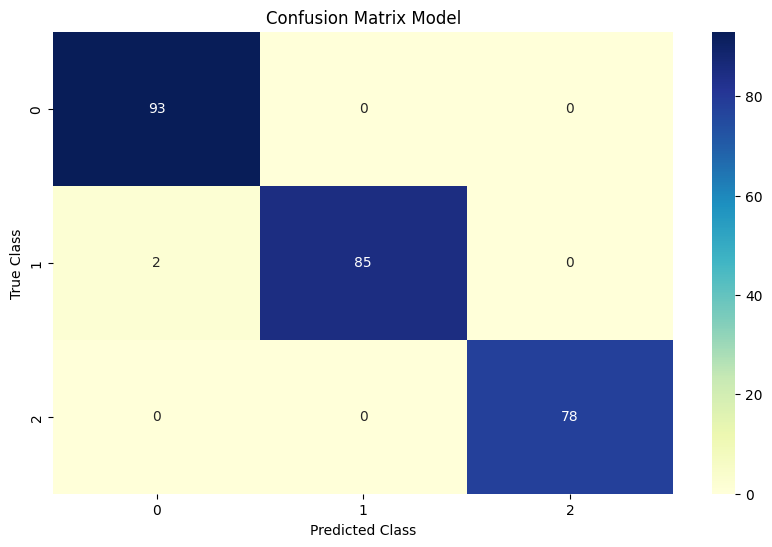

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix Model")

In [ ]:
import os
from tensorflow.python.saved_model.save import save
save_dir = os.path.join('/tmp','saved_model.h5')
model.save(save_dir)


In [ ]:
!pip3 install tensorflowjs


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 793.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully un

In [ ]:
!cd /tmp/
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /tmp/saved_model.h5 /tmp/tfjs_model

In [ ]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)


In [ ]:
tfmodel = converter.convert()

Saved artifact at '/tmp/tmpmw2e3ke7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132416151577248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069680320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069680848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069677328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069673984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069678560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069678912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069963616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069962912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069961504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132416069960976: TensorS

In [ ]:
open('milk.tflite','wb').write(tfmodel)

12104

In [ ]:
!ls -l milk.tflite


-rw-r--r-- 1 root root 12104 Dec 13 03:03 milk.tflite


In [ ]:
from google.colab import files
files.download('milk.tflite')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>